## LightGBM Regression Solution - Predict Car Prices

<img src="images/carprices.jpg"/>

## Predict the price

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
df = pd.read_csv('data/autos.csv')

df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


### Exploratory Data Analysis (EDA)

In [3]:
# Describe the dataset
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329171,3.255317,10.142537,104.256098,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270875,0.313598,3.972040,39.519211,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Figure size 864x432 with 0 Axes>

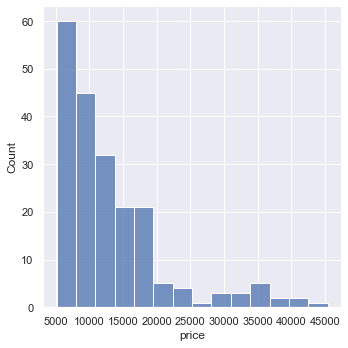

In [4]:
# Plot a distribution of the price
plt.figure(figsize=(12,6))
sns.displot(df['price'])

### Data Mining

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [6]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [7]:
# Create a variable of the categorical features
cat_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                'engine-type', 'num-of-cylinders','engine-size', 'fuel-system']

In [8]:
# Create dummy variables with categoriacal features
auto = pd.get_dummies(df,columns = cat_features, drop_first=True )

auto.head()

,symboling,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,...,engine-size_304,engine-size_308,engine-size_326,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,1,0,0


### Split the Data

In [9]:
X = auto.drop(['price'],axis=1)  # Independent variables

y = auto['price']                 # Dependent variables

In [10]:
# Split train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Built LGBM Model

In [11]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()   # Create a instance

model.fit(X_train,y_train)  # Fit the data in the Shell

LGBMRegressor()

In [12]:
# Make predictions
predictions = model.predict(X_test)

### Evaluete the Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Print the metrics
print('The Mean Absolute Error is', mean_absolute_error(y_test, predictions))
print('The Mean Squarred Error is ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is ', np.sqrt(mean_squared_error(y_test, predictions)))

The Mean Absolute Error is 1887.6726348063587
The Mean Squarred Error is  10508717.235128917
Root Mean Squared Error is  3241.71516872302


In [14]:
# Print the metrics
print('The Mean Absolute Error is', mean_absolute_error(y_test, predictions))
print('The Mean Squarred Error is ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is ', np.sqrt(mean_squared_error(y_test, predictions)))

The Mean Absolute Error is 1887.6726348063587
The Mean Squarred Error is  10508717.235128917
Root Mean Squared Error is  3241.71516872302


### Visual Analysis

Text(0.5, 1.0, 'Comparation between Prediction Price and Real Price')

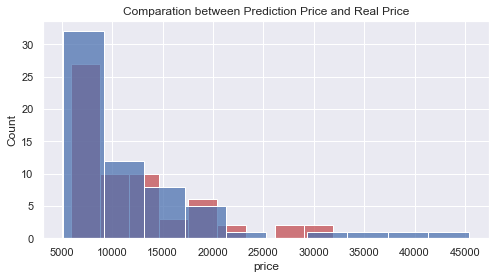

In [15]:
# Plot the distribution plot of the 'Predicted Price' and the 'Real Price'
plt.figure(figsize=(8,4))
sns.histplot(predictions,color='r')
sns.histplot(y_test)
plt.title('Comparation between Prediction Price and Real Price')

Text(0.5, 1.0, 'Distribution of the differences between the true values and the predicted values')

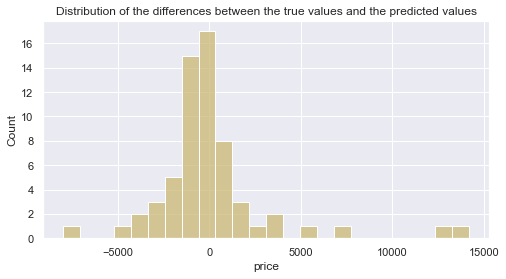

In [16]:
# Plot a distribution of the differences between the true values and the predicted values
plt.figure(figsize=(8,4))
sns.histplot((y_test-predictions),color='y')
plt.title('Distribution of the differences between the true values and the predicted values')

<AxesSubplot:xlabel='price'>

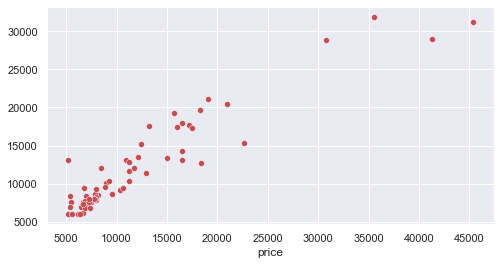

In [17]:
# Plot the scatterplot of the predictions and the true values
plt.figure(figsize=(8,4))
sns.scatterplot(y_test,predictions,color='r')

In [18]:
# Create a dataframe of the importances

importance = model.feature_importances_

importances_rfc_df = pd.DataFrame(importance, index=X.columns, columns=['Importance'])

importances_rfc_df = importances_rfc_df.sort_values(by='Importance', ascending=False)

importances_rfc_df = importances_rfc_df[importances_rfc_df['Importance'] > 0]

importances_rfc_df = importances_rfc_df.head(10)

Text(0.5, 1.0, 'Impact in the prices')

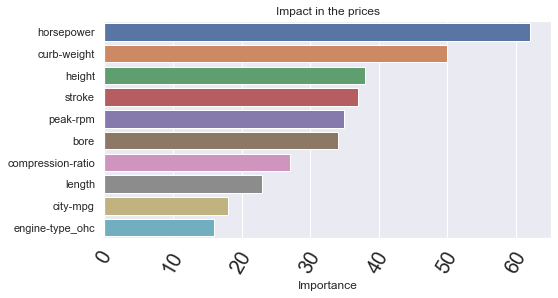

In [19]:
# Plot the importances

plt.figure(figsize=(8,4))
plt.xticks(rotation=60, fontsize = 20)
sns.barplot(y=importances_rfc_df.index, x=importances_rfc_df['Importance'])
plt.title('Impact in the prices')